In [1]:
# Instalando as bibliotecas e atualizando 
!pip install pyDOE
!pip install -U seaborn
# Import MEF 1D Algorithm
!pip install -i https://test.pypi.org/simple/ FINITO-FEM-TOOLBOX

Requirement already up-to-date: seaborn in c:\users\wanderlei\anaconda3\lib\site-packages (0.11.1)
Looking in indexes: https://test.pypi.org/simple/


In [2]:
from FINITO_FEM_TOOLBOX import MEF1D
from RASD_TOOLBOX import *
import numpy as np

In [3]:
PX = ['NORMAL', 500, 100]
PY = ['NORMAL', 1000, 100]
PZ = ['NORMAL', 3, 0.3]
POP = [10, int(1E3), int(1E4), int(1E5)]

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 2,
        'D': 3,
        'VARS': [PX, PY, PZ],
        'MODEL': 'MCS'}

In [4]:
def OBJ(X):
    P_X = X[0]
    P_Y = X[1]
    P_Z = X[2]
    
    D_0 = 3
    L = 100
    E = 30 * 10 ** 6
    W = 2
    T = 4

    # STATE LIMIT FUNCTION
    
    R_0 = P_Z
    S_0 = (4 * L ** 3 / (E * W * T)) * (((P_Y / T ** 2) ** 2  + (P_X / W ** 2) ** 2) ** 0.5)
    G_0 = - R_0 + S_0

    R_1 = P_Z * 1.10
    S_1 = ((4 * L ** 3 / (E * W * T)) * (((P_Y / T ** 2) ** 2  + (P_X / W ** 2) ** 2) ** 0.5)) * 1.05
    G_1 = - R_1 + S_1

    R = [R_0, R_1] 
    S = [S_0, S_1] 
    G = [G_0, G_1]


    return R, S, G

In [5]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [17]:
RESULTS_TEST[4]

IndexError: list index out of range

In [7]:
WANDER = RESULTS_TEST[3]['TOTAL RESULTS']

In [8]:
RESULTS_TEST['TOTAL RESULTS']['I_0'][(RESULTS_TEST['TOTAL RESULTS']['I_0']==1)]

TypeError: list indices must be integers or slices, not str

C:\Users\Wanderlei\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


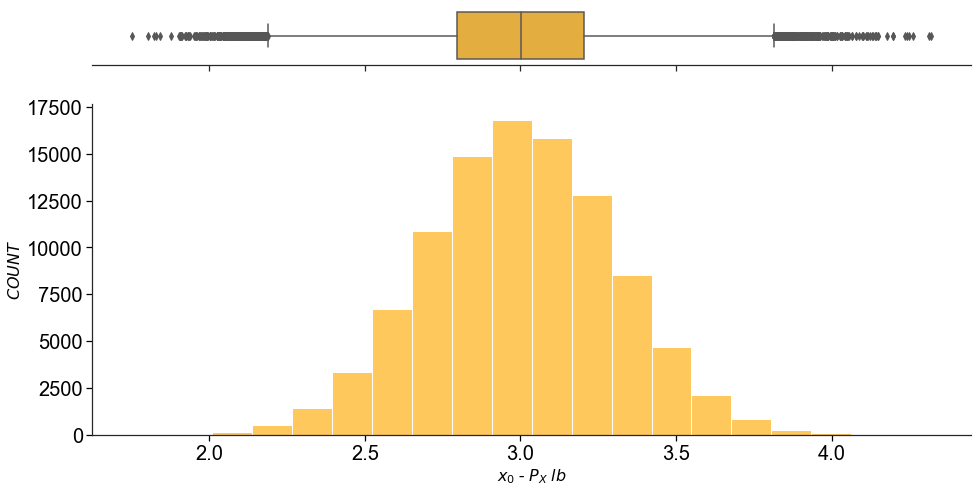

In [9]:
PLOT_SETUP = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS LABEL': '$x_0$ - $P_X$ $lb$',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
DATASET = WANDER['X_2']      
# CALL PLOT
RASD_PLOT_1(DATASET, PLOT_SETUP)

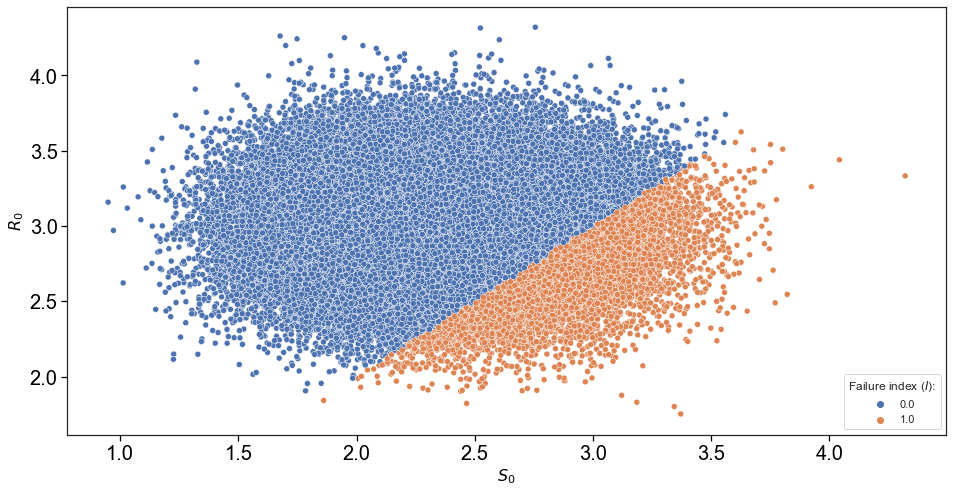

In [10]:
PLOT_SETUP = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.40, 
                'HEIGHT': 0.20,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
DATASET =  WANDER     
# CALL PLOT
RASD_PLOT_2(DATASET, PLOT_SETUP)

In [ ]:
PLOT_SETUP = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'C VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}
# RESULTS
DATASET = WANDER  
# CALL PLOT
RASD_PLOT_3(DATASET, PLOT_SETUP)

In [ ]:
plt.hist(RESULTS_TEST['TOTAL RESULTS']['R_0'], bins=50, label='a', alpha=0.5)
plt.hist(RESULTS_TEST['TOTAL RESULTS']['S_0'], bins=50, label='b', alpha=0.5)


In [ ]:
PLOT_SETUP = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$G_0$',
                    'Y AXIS LABEL': 'SOMATÓRIO',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
DATASET = WANDER  
# CALL PLOT
RASD_PLOT_4(DATASET, PLOT_SETUP)